In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('Big_Mart_Sales_Train.csv')

In [69]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [71]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [73]:
missing = data['Outlet_Size'].isnull()
missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [74]:
data.loc[missing, 'Outlet_Size'] = data.loc[missing, 'Outlet_Type'].apply(lambda x: mode[x])

In [75]:
data['Outlet_Size'].isnull().sum()

0

In [76]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [77]:
data.shape

(8523, 12)

In [78]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [80]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [81]:
sns.set()

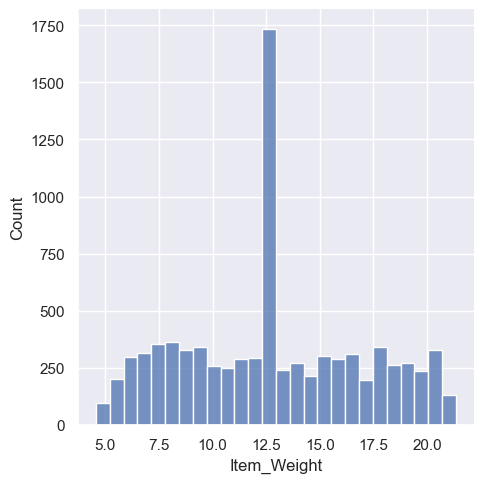

In [82]:
sns.displot(data['Item_Weight'])

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

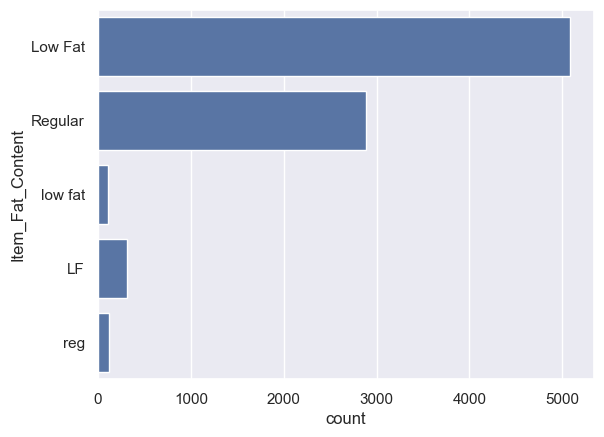

In [83]:
sns.countplot(data['Item_Fat_Content'])

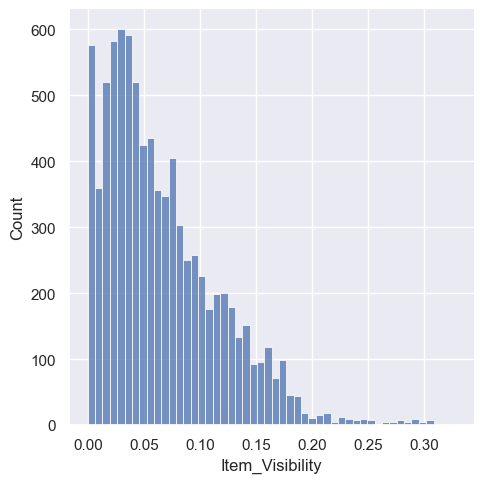

In [84]:
sns.displot(data['Item_Visibility'])

<Axes: xlabel='count', ylabel='Item_Type'>

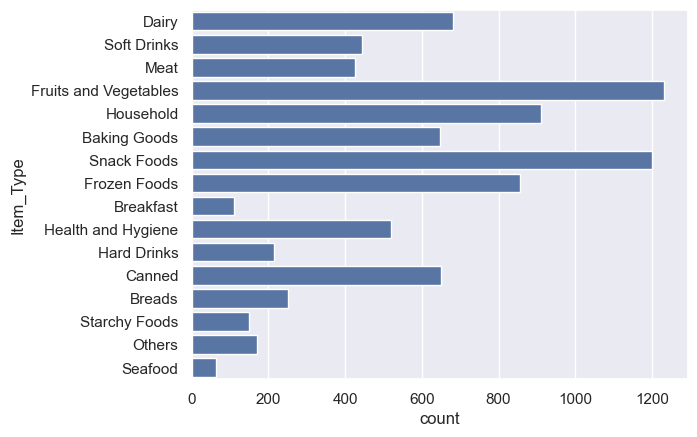

In [85]:
sns.countplot(data['Item_Type'])

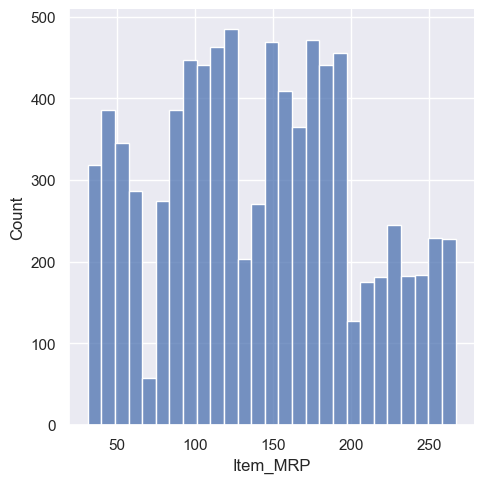

In [86]:
sns.displot(data['Item_MRP'])

<Axes: xlabel='count', ylabel='Outlet_Size'>

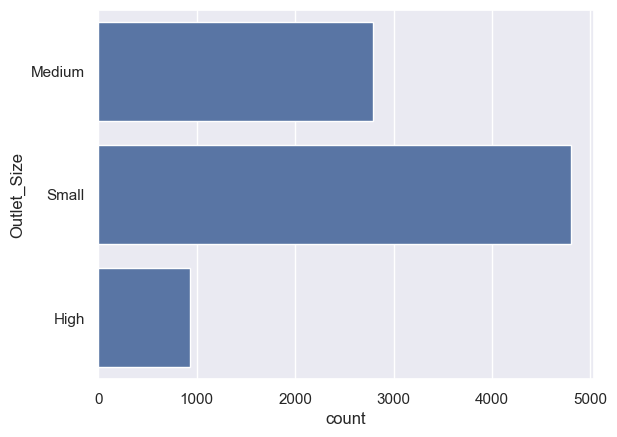

In [87]:
sns.countplot(data['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

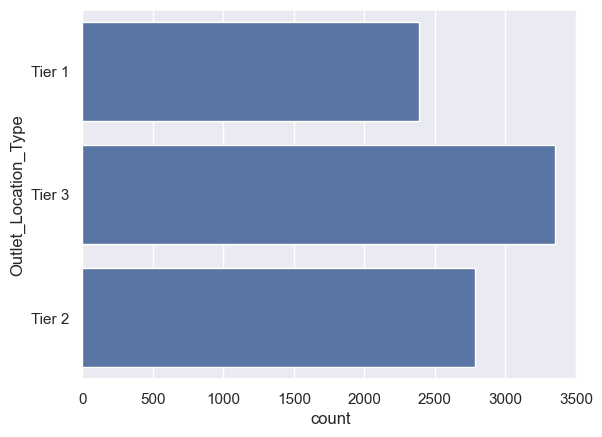

In [88]:
sns.countplot(data['Outlet_Location_Type'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

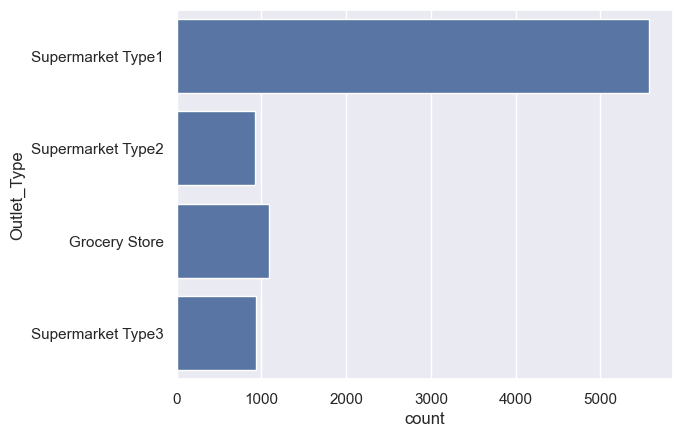

In [89]:
sns.countplot(data['Outlet_Type'])

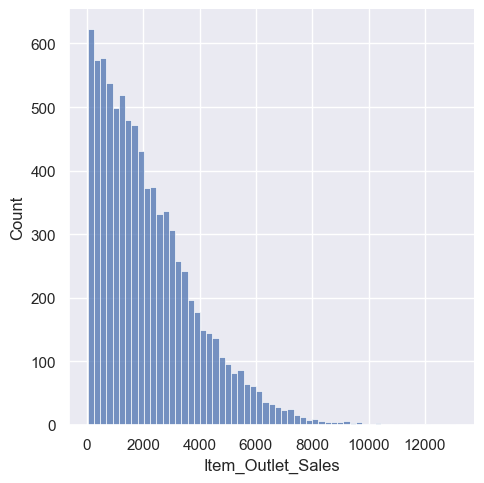

In [90]:
sns.displot(data['Item_Outlet_Sales'])

In [91]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [92]:
x.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [93]:
y.head(3)

0    3735.1380
1     443.4228
2    2097.2700
Name: Item_Outlet_Sales, dtype: float64

In [94]:
cat = x.select_dtypes(include = ['object', 'category']).columns.tolist()
num = x.select_dtypes(include = ['int64', 'float64']).columns.tolist()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [95]:
print(cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [96]:
print(x['Item_Identifier'].value_counts())
print('unique values', x['Item_Identifier'].nunique())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
unique values 1559


In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['Item_Identifier'] = encoder.fit_transform(x['Item_Identifier'])
x['Item_Identifier']

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

In [98]:
x['Item_Fat_Content'].nunique()

5

In [99]:
x['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [100]:
x = x.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}})
x['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

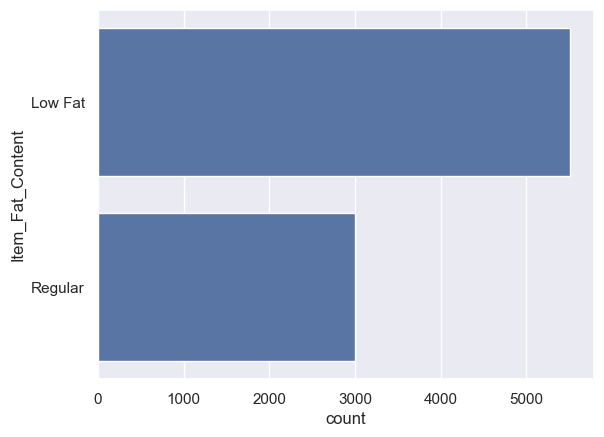

In [101]:
sns.countplot(x['Item_Fat_Content'])

In [102]:
x['Item_Fat_Content'] = encoder.fit_transform(x['Item_Fat_Content'])

In [103]:
x['Item_Type'].nunique()

16

In [104]:
x['Item_Type'] = encoder.fit_transform(x['Item_Type'])

In [105]:
x['Outlet_Identifier'].nunique()

10

In [106]:
x['Outlet_Identifier'] = encoder.fit_transform(x['Outlet_Identifier'])

In [107]:
x['Outlet_Size'].nunique()

3

In [108]:
x['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [109]:
x['Outlet_Size'] = encoder.fit_transform(x['Outlet_Size'])

In [110]:
x['Outlet_Location_Type'].nunique()

3

In [111]:
x["Outlet_Location_Type"] = encoder.fit_transform(x["Outlet_Location_Type"])

In [112]:
x['Outlet_Type'].nunique()

4

In [113]:
x['Outlet_Type'] = encoder.fit_transform(x['Outlet_Type'])

In [114]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [115]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [117]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,1102,9.500,1,0.035206,6,171.3448,9,1999,1,0,1
7757,1322,18.000,0,0.047473,9,170.5422,7,2002,2,1,1
764,1169,17.600,1,0.076122,10,111.7202,8,1997,2,0,1
6867,789,8.325,0,0.029845,6,41.6138,7,2002,2,1,1
2716,757,12.850,0,0.137228,13,155.5630,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,1172,9.395,1,0.286345,6,139.1838,0,1998,2,2,0
5191,263,15.600,0,0.117575,5,75.6670,2,2007,2,1,1
5390,1464,17.600,0,0.018944,8,237.3590,7,2002,2,1,1
860,609,20.350,0,0.054363,13,117.9466,2,2007,2,1,1


In [118]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,487,14.300000,0,0.026300,5,79.4302,1,1987,0,2,1
2957,1392,7.930000,0,0.071136,8,42.7086,8,1997,2,0,1
7031,244,14.500000,1,0.041313,3,42.0454,9,1999,1,0,1
1084,14,12.857645,1,0.044767,14,173.7054,5,1985,1,2,3
856,890,10.195000,1,0.012456,10,197.5110,6,2004,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7205,526,11.800000,1,0.093656,13,127.1704,8,1997,2,0,1
3257,911,7.020000,0,0.000000,6,148.1734,3,2009,1,2,2
6346,244,14.500000,1,0.041215,3,42.0454,1,1987,0,2,1
6318,1176,9.800000,1,0.141184,0,50.5008,3,2009,1,2,2


In [119]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [120]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [122]:
pred = regressor.predict(x_test)

In [123]:
pred

array([1013.64115768,  691.93783769,  988.43728979, ...,  472.38552171,
       1222.65825906, 1596.13981601])

In [124]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test,pred))

0.520159740836994


In [125]:
train_pred = regressor.predict(x_train)
train_pred

array([3031.84810456, 2545.7967489 , 1803.46681343, ..., 3638.88720314,
       1405.05741914, 1592.98056287])

In [128]:
print(r2_score(y_train,train_pred))

0.49942172643737814
